In [1]:
#step1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Ignore harmless warnings
import  warnings
warnings.filterwarnings("ignore")
#set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#To run sql queries on DataFrame
import pandasql as psql

In [2]:
#step2
# Load the bank data
bank= pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\internship datsets&files\Universalbank.csv", header = 0)
#copy the back-up files
bank_bk=bank.copy()
#display bank data
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#step3
#dispaly data set information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#STEP4
#count the target or dependent variable by 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
CreditCard_count=bank.CreditCard.value_counts()
print("class0:" ,CreditCard_count[0])
print("class1:" ,CreditCard_count[1])
print("prportion:" ,round(CreditCard_count[0]/CreditCard_count[1],2),":1")
print("total bank records:" ,len(bank))

class0: 3530
class1: 1470
prportion: 2.4 :1
total bank records: 5000


In [5]:
#step5
#dispalying duplicate values in data set
bankdup=bank[bank.duplicated(keep="last")]
#display duplicate records
bankdup

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [6]:
#step6
#identify missing values  in  the variables
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#STEP7
#dispaly all columns in data set
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
#identify the variables to normalize minmax scaler
cols=['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education','Mortgage']

In [9]:
# delete the variables id and zipcode
del bank['ID']
del bank['ZIP Code']
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [10]:
#identify the independent and target variables
indepvar=[]
for col in bank.columns:
    if col!='CreditCard':
        indepvar.append(col)
targetvar='CreditCard'
x=bank[indepvar]
y=bank[targetvar]

In [11]:
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Display the shape for train & test data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [12]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
#x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
#x_test = mmscaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test)

In [13]:
# decision tree model with random sampling
from sklearn.tree import DecisionTreeClassifier
#create obj for model
ModelDT= DecisionTreeClassifier()
#ModelLR=LogisticRegression(penalty='l2',dyual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class="auto",verbose=0,warm_state=False,n_jobs=None,l1_ratio=None)
ModelDT.fit(x_train,y_train)

y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)



In [14]:
#to dispaly the algorithm hyper parameters
params=ModelDT.get_params()
print(params)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


confusion_matrix:
 [[181 246]
 [299 774]]
outcome values:
 181 246 299 774
Classification report : 
               precision    recall  f1-score   support

           1       0.38      0.42      0.40       427
           0       0.76      0.72      0.74      1073

    accuracy                           0.64      1500
   macro avg       0.57      0.57      0.57      1500
weighted avg       0.65      0.64      0.64      1500

Accuracy : 63.7 %
Precision : 37.7 %
Recall : 42.4 %
F1 Score : 0.399
Specificity or True Negative Rate : 72.1 %
Balanced Accuracy : 57.2 %
MCC : 0.14
roc_auc_score: 0.573


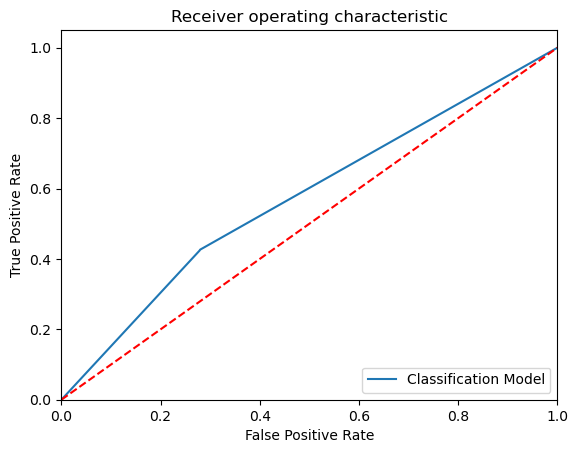

-----------------------------------------------------------------------------------------------------


In [15]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted  values
predicted=y_pred
#confusin matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion_matrix:\n",matrix)
#outcomes values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:\n",tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [16]:
Results = pd.DataFrame({'CreditCard_A':y_test, 'CreditCard_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = bank_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CreditCard_A,CreditCard_P
2722,2723,58,34,31,92126,4,0.4,1,0,0,0,0,0,0,0,0
733,734,49,24,80,92009,1,1.2,1,0,0,0,0,1,0,0,0
2702,2703,42,18,144,94063,2,6.1,1,158,0,0,0,0,0,0,0
1551,1552,50,25,192,94115,2,2.8,1,238,0,0,0,0,1,1,1
655,656,50,25,13,91109,2,0.7,3,0,0,0,0,0,0,0,0


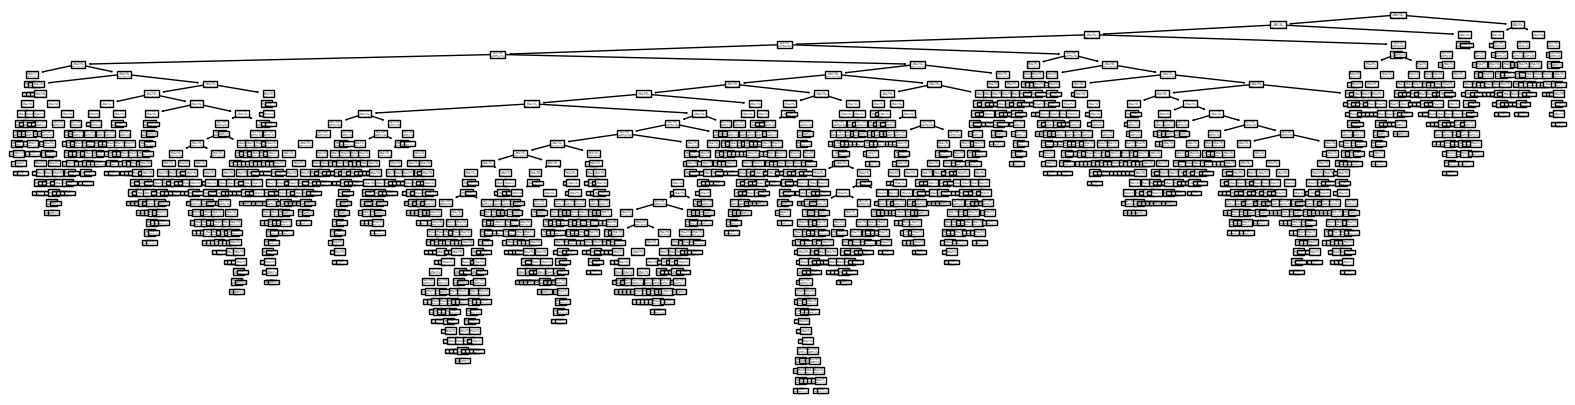

In [17]:
#PLOT THE DECISION TREE
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);